## Welcome to Detective Agency

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
from src.DigitalTwin import QuickStart

In [3]:
agency= QuickStart().go()

In [4]:
df=agency.get_dataframe()

In [5]:
df['cat_status']=df['status'].apply(lambda x: 'solved' if x else 'unsolved')

In [6]:
df

,status,init_date,finish_date,time_spent,detective_id,revenue,case_type,cat_status
0,0,2009-02-06 06:19:11.862510,2009-02-07 05:17:16.225238,0 days 22:58:04.362728,1,0,adultery,unsolved
1,1,2000-11-01 08:59:14.257438,2000-11-10 20:52:00.666644,9 days 11:52:46.409206,0,800,adultery,solved
2,0,2013-08-20 05:48:05.993369,2013-08-30 00:56:07.905230,9 days 19:08:01.911861,0,0,murder,unsolved
3,1,2018-07-01 13:52:54.652656,2018-07-11 13:01:53.382772,9 days 23:08:58.730116,0,500,theft,solved
4,1,2014-03-01 04:25:45.520031,2014-03-12 02:27:42.166267,10 days 22:01:56.646236,0,800,adultery,solved
...,...,...,...,...,...,...,...,...
995,0,2007-11-19 00:05:40.945669,2007-11-29 19:55:26.335484,10 days 19:49:45.389815,0,0,adultery,unsolved
996,0,2010-04-22 23:06:51.380587,2010-05-03 19:24:42.962910,10 days 20:17:51.582323,0,0,murder,unsolved
997,1,2005-05-29 19:21:44.532705,2005-06-01 13:40:16.764500,2 days 18:18:32.231795,1,500,theft,solved
998,0,2005-04-11 17:07:08.306590,2005-04-20 17:30:34.212306,9 days 00:23:25.905716,0,0,murder,unsolved


In [7]:
rm = df[df.detective_id==0]
sh = df[df.detective_id==1]

In [8]:
rm_means=pd.Series([rm.sample(frac=1, replace=True)['revenue'].mean() for _ in range(10000)])
sh_means=pd.Series([sh.sample(frac=1, replace=True)['revenue'].mean() for _ in range(10000)])

In [9]:
effect=sh_means.mean()-rm_means.mean()
diffs= sh_means-rm_means-effect
p_value = np.mean(np.abs(diffs) >= np.abs(effect))

In [10]:
zalpha=stats.norm.ppf(0.025)
se=np.sqrt(sum([(x)**2 for x in diffs])/len(diffs))

In [11]:
print(f"Observed effect: {effect}")
print(f"Bootstrap p-value: {p_value}")

Observed effect: 79.57218258863486
Bootstrap p-value: 0.0759


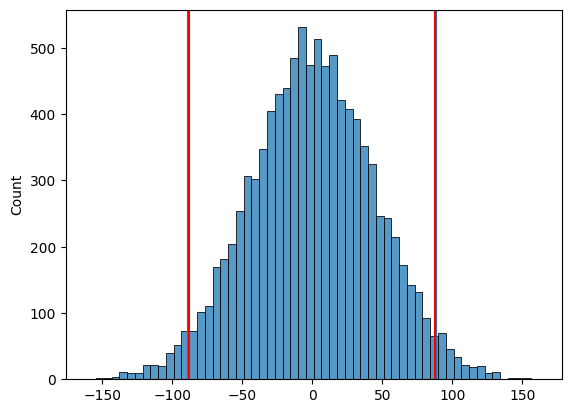

In [12]:
sns.histplot(diffs)

plt.axvline(diffs.quantile(0.025))
plt.axvline(diffs.quantile(0.975))
plt.axvline(se*1.96,color='r')
plt.axvline(-se*1.96,color='r')

Normality

In [13]:
from scipy.stats import shapiro
shapiro(diffs)

/opt/homebrew/Caskroom/mambaforge/base/envs/detective/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.9998578372257927), pvalue=np.float64(0.8225291619652324))

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943], shape=(10000,)),
  array([-160.13899718, -154.00384602, -153.09066254, ...,  151.85254386,
          151.96068401,  161.93681307], shape=(10000,))),
 (np.float64(44.8723296728111),
  np.float64(-4.382020432060722e-15),
  np.float64(0.9999478900349585)))

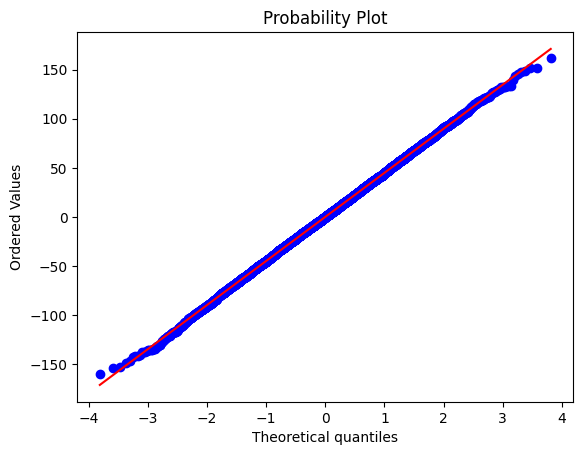

In [14]:
stats.probplot(diffs, dist='norm', plot=plt)